<img src='./img/LogoWekeo_Copernicus_RGB_0.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='20%'></img>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./31_cams_eac4_load_browse.ipynb"><< 31 - CAMS EAC4 - Load and browse</a>

<div class="alert alert-block alert-success">
<b>EXERCISE</b></div>

# Copernicus Atmosphere Monitoring Service (CAMS) EAC4 

The Copernicus Atmopshere Monitoring Service (CAMS) provides consistent and quality-controlled information related to air pollution and health and greenhouse gases. CAMS data consist of `global forecasts and analyses`, `global reanalyses`, `fire emissions` and `greenhouse gas flux inversions`.

#### Module outline:
* [1 - Load, browse and plot CAMS fire emissions data](#cams_gfas)
* [2 - Example - CAMS regional forecast data](#cams_regional)
* [3 - Load, browse and plot CAMS greenhouse gas flux inversions](#load_ggf)

#### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [2]:
from ipynb.fs.full.ltpy_functions import visualize_pcolormesh

<hr>

## <a id="cams_gfas"></a>Load, browse and plot CAMS fire emissions data

<br>

## <a id='cams_regional'></a>Example - CAMS regional forecast data

### Load CAMS station location data

CAMS data offers regional forecast and station location data in `csv`. With the help of the Python library [Pandas](https://pandas.pydata.org/) and its function `read_csv`, csv files can easily be read.
You can read the station locations and with `len()` you can see that it contains 2949 station data.

In [11]:
station_locations = '../eodata/cams/regional/csv/CAMS_WEB_LOCATIONS_V1.csv'

locations = pd.read_csv(station_locations)
len(locations)

2949

Pandas' `head()` function allows you to get the first couple of entries of the list. This is helpful to get an overview of the csv content. You see that the csv contains station `ID`, `name`, `Country`, `Latitude` and `Longitude` information.

In [12]:
locations.head()

,ID,Name,Country,Latitude,Longitude
0,AMXX0003,Yerevan,Armenia,40.13,44.47
1,AMXX0001,Abovyan,Armenia,40.17,44.58
2,AMXX0002,Gyumri,Armenia,40.79,43.84
3,AUXX0097,Mattersburg,Austria,47.73,16.40
4,AUXX0100,Gussing,Austria,47.07,16.33


You can select a city and filter for entries for this location. Let's make an example with `Paris`. You can see that the dataset contains two entries, where the station `Name` contains the string `Paris`.

In [13]:
city = 'Paris'
locations[locations['Name'].str.contains(city)]

,ID,Name,Country,Latitude,Longitude
653,FRXX0077,Paris-Charles-De-Gaulle,France,48.87,2.33
710,FRXX0076,Paris,France,48.73,2.40


### Load CAMS regional forecast data

The same principle you can apply to load and read the regional forecast data. Let's use Pandas' `read_csv` function. By specifying a `DATE`, you can parse the file that contains the data for this specific day. Let's do an example to filter the data for `10 May 2018`.

You see that the `csv` contains measurements of `O3`, `NO2`, `SO2`, `CO`, `PM10` and `PM2.5`.

In [14]:
DATE='20180510'
DPLUS=1

datafile = '../eodata/cams/regional/csv/CAMS_WEB_FORECAST_%s_D+%d.csv.gz'
path = datafile % (DATE, DPLUS)
aq_data = pd.read_csv(path, index_col=['ID', 'Date_Time'], parse_dates=[['Date','Time']] )
aq_data.head()

AQI     O3   NO2   SO2      CO   PM10   PM25
ID       Date_Time                                                        
ALXX0001 2018-05-11 01:00:00    2  49.31  2.23  0.96  160.87  12.79  11.84
         2018-05-11 02:00:00    2  47.74  1.91  0.94  161.70  13.38  11.97
         2018-05-11 03:00:00    2  46.72  1.64  0.93  162.34  13.64  11.91
         2018-05-11 04:00:00    2  44.59  1.46  1.10  163.71  14.06  11.78
         2018-05-11 05:00:00    2  52.69  1.74  1.30  165.78  14.29  11.01

### Visualize regional `Air Quality` forecast data for one specific station location

We can now filter the station ID for `Paris-Charles-de-Gaulle` and visualize all `Air Quality` forecast parameters for `11 May 2018`.

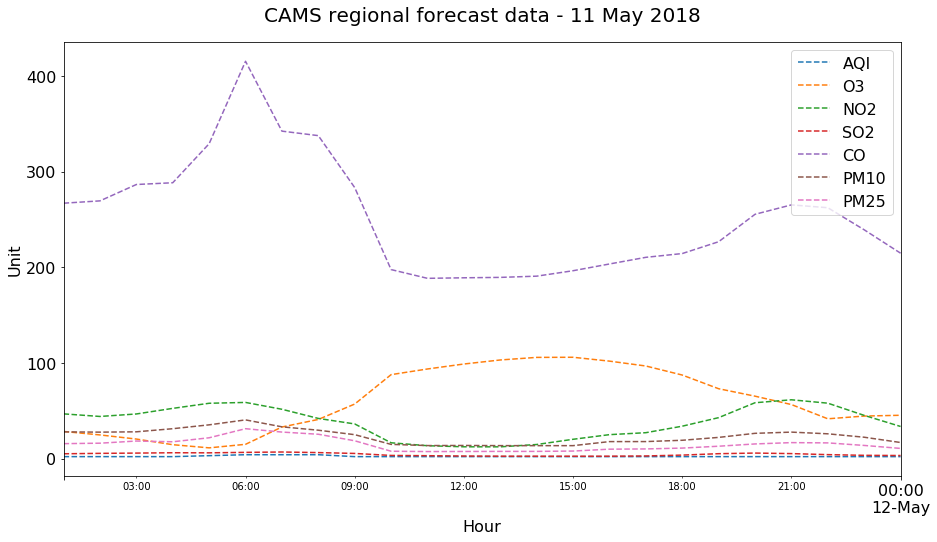

In [15]:
aq_data.loc['FRXX0077'].plot.line(figsize=(15,8),linestyle='dashed')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('CAMS regional forecast data - 11 May 2018', fontsize=20, pad=20)

plt.ylabel('Unit', fontsize=16)
plt.xlabel('Hour', fontsize=16)

plt.legend(fontsize=16,loc=1)
plt.show()

<br>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./31_cams_eac4_load_browse.ipynb"><< 31 - CAMS EAC4 - Load and browse</a>

<hr>

<p><img src='./img/all_partners_wekeo.png' align='left' alt='Logo EU Copernicus' width='100%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="./LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on Github</a>